In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset
df = pd.read_csv("dataset\\dataset.csv") 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
# Count unique diseases
print("\nUnique Diseases:", df['Disease'].nunique())


Unique Diseases: 41


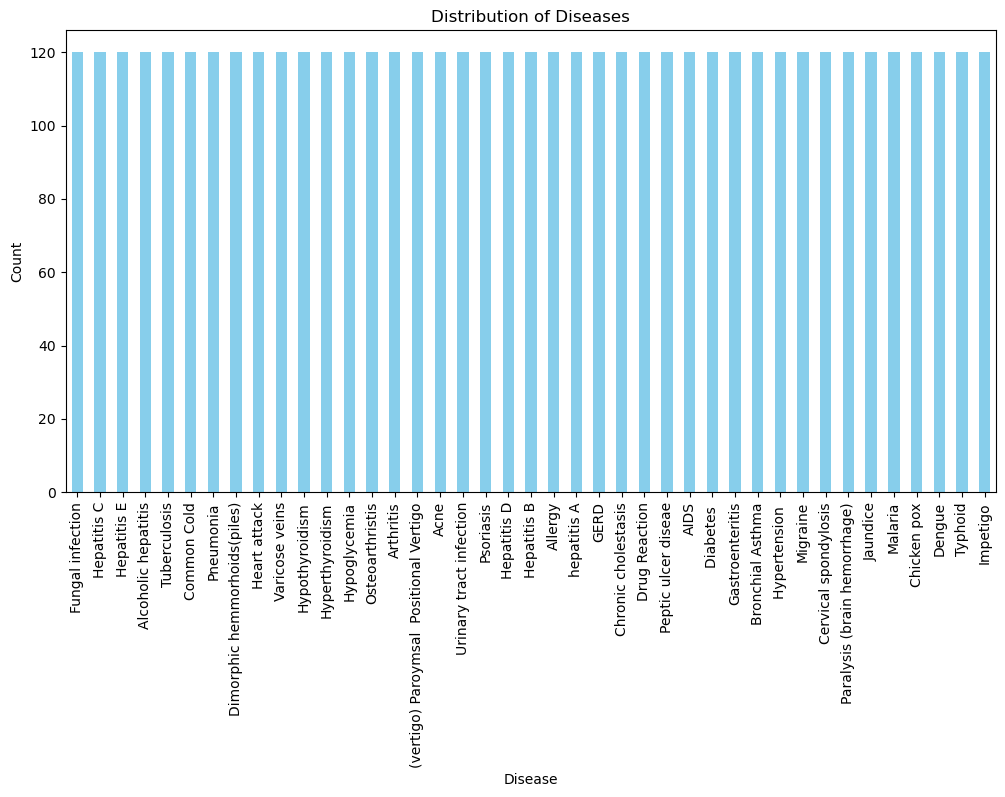

In [8]:

# Disease Distribution
plt.figure(figsize=(12, 6))
df['Disease'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [9]:
# Count symptom frequency
symptom_counts = df.iloc[:, 1:].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)


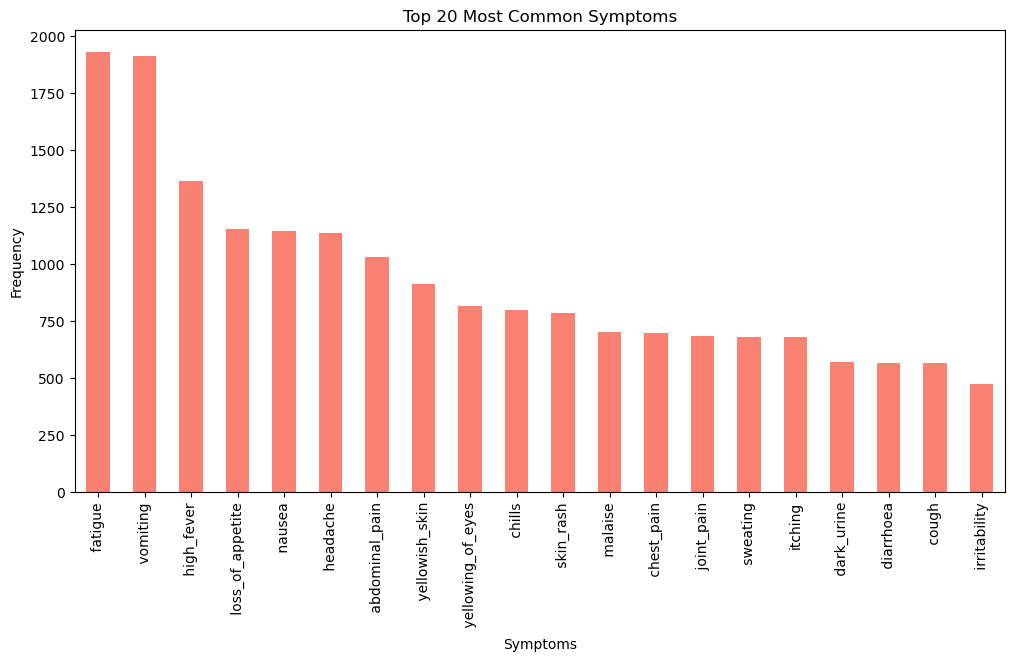

In [10]:
# Top 20 most common symptoms
plt.figure(figsize=(12, 6))
symptom_counts.head(20).plot(kind="bar", color="salmon")
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [12]:
threshold = 0.55  # If more than 55% of values are missing, drop the column
df = df.dropna(thresh=int(threshold * len(df)), axis=1)

In [13]:
df.shape

(4920, 7)

In [14]:
# Handle Missing Value
df.fillna("Unknown", inplace=True)

In [15]:
# Encode Target Column (Disease)
label_encoder = LabelEncoder()
df["Disease"] = label_encoder.fit_transform(df["Disease"])  # Encode disease names as numbers

In [18]:
# Encode Symptoms (One-Hot Encoding)
symptom_columns = df.columns[1:] 
df_encoded = pd.get_dummies(df, columns=symptom_columns)

In [19]:
# Train-Test Split
X = df_encoded.drop("Disease", axis=1)
y = df["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define ML Models & Hyperparameters
models = {
    "Logistic Regression": (LogisticRegression(), {"C": [0.1, 1, 10]}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [3, 5, 10]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200]}),
    "SVM": (SVC(), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"), {"n_estimators": [50, 100], "max_depth": [3, 5]}),
}

In [22]:
# Train Models & Perform Hyperparameter Tuning
best_model = None
best_score = 0
results = {}

for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model_params = grid_search.best_params_
    best_model_score = grid_search.best_score_
    
    # Store results
    results[model_name] = (best_model_params, best_model_score)

    # Update best model
    if best_model_score > best_score:
        best_score = best_model_score
        best_model = grid_search.best_estimator_


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training Gradient Boosting...
Training XGBoost...


c:\Users\Akash\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:38:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
# Evaluate Best Model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n Best Model:", best_model)
print("Best Accuracy on Test Data:", accuracy * 100, "%")


 Best Model: RandomForestClassifier(n_estimators=50)
Best Accuracy on Test Data: 99.79674796747967 %


In [24]:
# Print all models' results
print("\n Model Performance Comparison:")
for model, (params, score) in results.items():
    print(f"{model}: Best Params: {params}, CV Accuracy: {score:.4f}")


 Model Performance Comparison:
Logistic Regression: Best Params: {'C': 0.1}, CV Accuracy: 0.9972
Decision Tree: Best Params: {'max_depth': 10}, CV Accuracy: 0.5102
Random Forest: Best Params: {'n_estimators': 50}, CV Accuracy: 0.9975
SVM: Best Params: {'C': 0.1, 'kernel': 'linear'}, CV Accuracy: 0.9972
Gradient Boosting: Best Params: {'learning_rate': 0.1, 'n_estimators': 50}, CV Accuracy: 0.9972
XGBoost: Best Params: {'max_depth': 3, 'n_estimators': 50}, CV Accuracy: 0.9962
